# Clustering Penguins

<img src="../images/penguins.png" alt="" width="600"/>

In [1]:
# Import numpy
import numpy as np

# Import pandas
import pandas as pd
pd.set_option('display.max_columns', None)

# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Apply the default theme
sns.set_theme()

In [2]:
df = pd.read_csv("../data/penguins.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


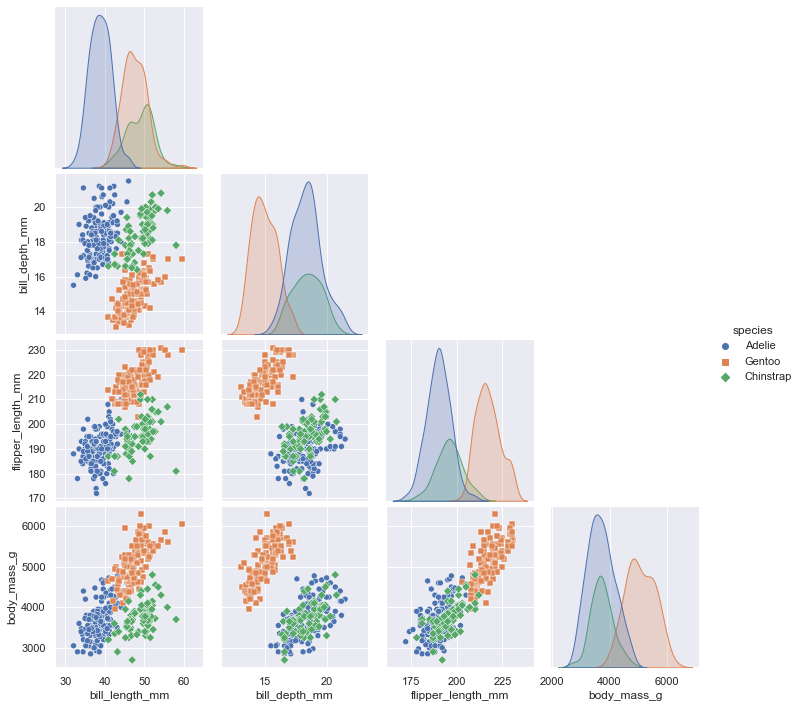

In [3]:
_ = sns.pairplot(
    data=df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']],
    hue="species",
    markers=["o", "s", "D"],
    corner=True
)

# Dimensionality Reduction
The number of features (i.e. columns) in our data can be difficult to manage or even mis-leading. Dimensionality reduction is a set of techniques for reducing the size of the dataset under examination.

In general, the idea is to regard a dataset as a matrix and to decompose the matrix into simpler, meaningful pieces. Dimensionality reduction is generally performed as a pre-processing step before another learning algorithm (e.g. K-Means) is applied. 

Dimensionality reduction can help, 
* Reduce computational expense
* Reduce susceptibility of overfitting
* Reduce noise in the dataset
* Enhance our intuition

# Selecting & Scaling Features
[link to related nbviewer]

Pre-processing features using external criteria (i.e. filtering) or through scaling can have a substantial impact on the success of K-Means

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
features = [
    'bill_length_mm',
    'bill_depth_mm',
    'flipper_length_mm',
    'body_mass_g'
]

# drop any missing values
df = df.dropna(subset=features).reset_index()

In [6]:
# convert the numerical values into a matrix (2D array) 
x = df.loc[:, features].values
x

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  49.6,   18.2,  193. , 3775. ],
       [  50.8,   19. ,  210. , 4100. ],
       [  50.2,   18.7,  198. , 3775. ]])

In [7]:
# df.head()

In [8]:
x = StandardScaler().fit_transform(x)
x

array([[-0.88449874,  0.78544923, -1.41834665, -0.56414208],
       [-0.81112573,  0.1261879 , -1.06225022, -0.50170305],
       [-0.66437972,  0.43046236, -0.42127665, -1.18853234],
       ...,
       [ 1.04154272,  0.53188718, -0.56371522, -0.53292256],
       [ 1.26166175,  0.93758646,  0.64701263, -0.1270689 ],
       [ 1.15160224,  0.78544923, -0.20761879, -0.53292256]])

In [9]:
from sklearn.cluster import KMeans

In [10]:
km = KMeans(
    n_clusters = 3
)

result = km.fit(x)

In [11]:
result.cluster_centers_

array([[ 0.65722922, -1.09998045,  1.15886506,  1.0917612 ],
       [-1.04805941,  0.48655336, -0.89121603, -0.77061658],
       [ 0.66097295,  0.8169259 , -0.28620559, -0.37431308]])

In [12]:
result.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,

# Relating clusters to a categorical feature

In [13]:
df['cluster'] = pd.Series(result.labels_)

In [14]:
df.sample(10).sort_values(['species'])[['species', 'cluster']]

,species,cluster
130,Adelie,2
12,Adelie,1
132,Adelie,1
113,Adelie,1
7,Adelie,1
280,Chinstrap,2
329,Chinstrap,2
227,Gentoo,0
180,Gentoo,0
183,Gentoo,0


In [15]:
df[ df['species'] == 'Gentoo']['cluster'].value_counts()

0    123
Name: cluster, dtype: int64

In [16]:
df.groupby(['species', 'cluster']).size()

species    cluster
Adelie     1          127
           2           24
Chinstrap  1            5
           2           63
Gentoo     0          123
dtype: int64

In [17]:
def map_species(x):
    m = ['Gentoo', 'Adelie', 'Chinstrap']
    return m[x]

In [18]:
df['cluster_species'] = df['cluster'].apply(map_species)

In [19]:
df.head()

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,cluster,cluster_species
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1,Adelie
1,1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1,Adelie
2,2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1,Adelie
3,4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1,Adelie
4,5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,1,Adelie


In [20]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix

In [21]:
y_true = df['species'].values
y_predict = df['cluster_species'].values
y_labels=df['species'].unique()

In [22]:
data = confusion_matrix(y_true, y_predict, labels=y_labels)
data

array([[127,   0,  24],
       [  0, 123,   0],
       [  5,   0,  63]])

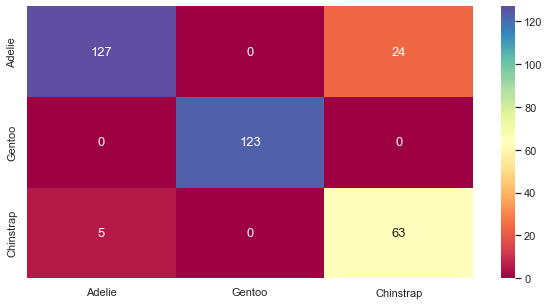

In [23]:
#specify size of heatmap
fig, ax = plt.subplots(figsize=(10, 5))

heatmap = sns.heatmap(
    pd.DataFrame(data, columns=y_labels, index=y_labels), 
    annot=True, 
    fmt="d", 
    annot_kws={"size":13},
    cmap="Spectral"
)

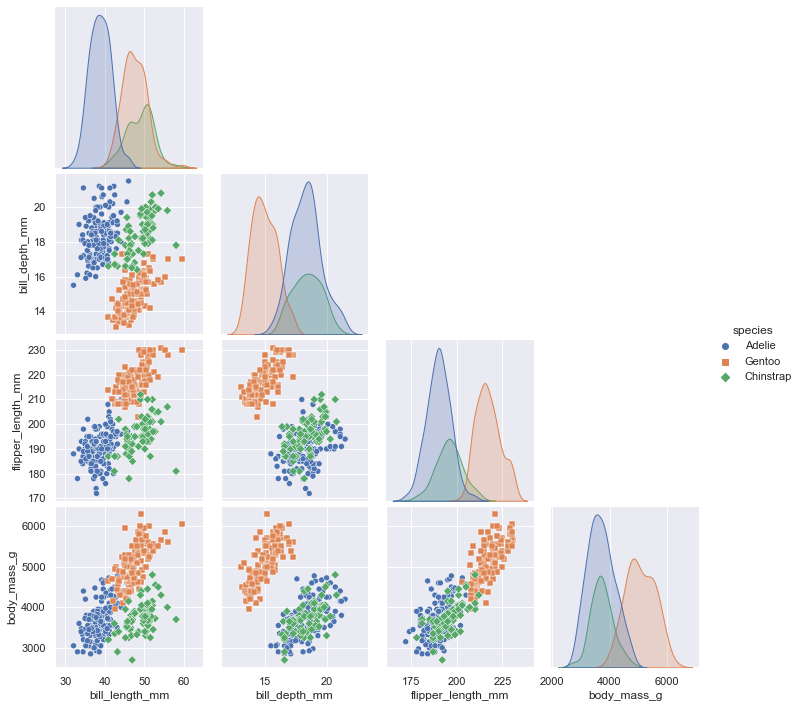

In [24]:
_ = sns.pairplot(
    data=df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']],
    hue="species",
    markers=["o", "s", "D"],
    corner=True
)


# Feature Extraction
## Principal Component Analysis
_Principal Component Analysis_, or PCA, is a technique for alleviating the "curse of dimensionality". It involves finding the direction along which higher dimensional data _lines up best_. The idea is to treat the dataset as a matrix $\textit{M}$ and find the eigenvectors for $\textit{MM}^T$ or $\textit{M}^T\textit{M}$. The matrix of these eigenvectors can be thought of as a rigid rotation in a high dimensional space. 

When you apply a PCA transformation to a dataset, you are placing heavy emphasis on the first few axes (i.e. the largest eigenvectors). The data along these axes will be where the variance of the data is maximized.

### High dimensional data
For datasets with a large number of features, we can view PCA as a data-mining technique. The high-dimensional data can be replaced by its projection onto the most important axes. Thus, the original data is approximated by data that has many fewer dimensions and that summarizes well the original data. 

### Visualizing higher order data
For datasets that may not have a super large number of features, but still more than 2, we can view PCA as a visualization technique. The high-dimensional data can be replaced by its projection onto a smaller set of axes that can more easily be graphed.


In [25]:
# https://scikit-learn.org/stable/modules/decomposition.html#pca
from sklearn.decomposition import PCA

In [26]:
x

array([[-0.88449874,  0.78544923, -1.41834665, -0.56414208],
       [-0.81112573,  0.1261879 , -1.06225022, -0.50170305],
       [-0.66437972,  0.43046236, -0.42127665, -1.18853234],
       ...,
       [ 1.04154272,  0.53188718, -0.56371522, -0.53292256],
       [ 1.26166175,  0.93758646,  0.64701263, -0.1270689 ],
       [ 1.15160224,  0.78544923, -0.20761879, -0.53292256]])

In [27]:
pca = PCA(
    n_components=2
)

principal_components = pca.fit_transform(x)

In [28]:
# principal_components

In [29]:
pcadf = pd.DataFrame(data= principal_components,
                       columns=["PCA 1", "PCA 2"])

pcadf['species'] = df['species']
pcadf['cluster'] = df['cluster_species']

In [30]:
pcadf.sample(10)

,PCA 1,PCA 2,species,cluster
18,-0.994247,1.985663,Adelie,Chinstrap
112,-0.731111,0.768762,Adelie,Chinstrap
280,-1.622835,0.558860,Chinstrap,Chinstrap
341,-0.201995,1.268715,Chinstrap,Chinstrap
210,2.787042,0.106315,Gentoo,Gentoo
331,-0.127347,1.685416,Chinstrap,Chinstrap
174,1.631557,-0.194551,Gentoo,Gentoo
153,1.561131,-0.683502,Gentoo,Gentoo
2,-1.369181,-0.154476,Adelie,Adelie
268,2.696812,0.342284,Gentoo,Gentoo


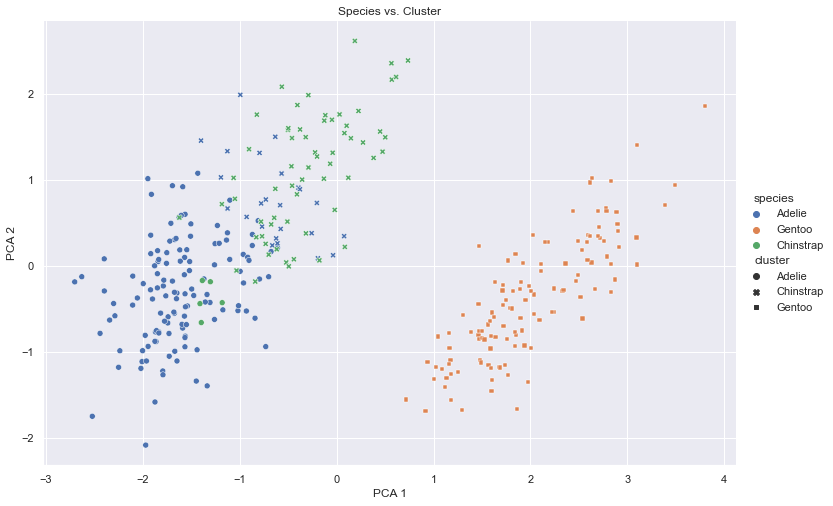

In [31]:
scatter = sns.relplot(
    data=pcadf, 
    x="PCA 1", 
    y="PCA 2", 
    kind="scatter",
    height=7,
    aspect=1.5, 
    hue="species",
    style="cluster",
).set(
    title="Species vs. Cluster"
)